# Data Preparation

We are go going to perform *data preparation*, or *data preprocessing*, or *data munging*, or *data wrangling* on the 
'bank' dataset

1.Encoded all categorical attributes as numerical 
2.Filled in all missing values
3.Applied a scaler to rescale features
4.Treated outliers appropriately
5.Created at least one new feature from the existing ones.
6.In the end, save the prepared dataset as a CSV file on your hard disk.

- There are missing values in some columns. We can estimate these values depending on the number of missing values and the expected importance of the column.

## A. Import Python Modules and Dataset

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


Check for missing values.

In [99]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Before we start transforming the dataset let's make a copy of it.

In [100]:
df_original = df

## B. Process and Encode the Categorical Features

### Column `Loan_ID`

Columns with ID numbers are unlikely to contain useful information and should be dropped.

In [101]:
#df.drop (column'1',axis=1, inplace=True)
df.tail(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1950,46.0,management,divorced,tertiary,no,624,no,no,cellular,17,sep,336,2,183,2,success,yes
1951,44.0,management,divorced,tertiary,no,2367,no,no,cellular,22,sep,263,1,184,6,success,yes
1952,23.0,technician,single,secondary,no,283,yes,no,cellular,22,sep,175,1,184,2,success,yes
1953,36.0,management,single,tertiary,no,5958,yes,no,cellular,22,sep,155,1,184,1,success,yes
1954,60.0,admin.,married,secondary,no,3735,no,no,cellular,22,sep,183,1,184,11,success,yes
1955,55.0,management,married,secondary,no,2693,no,no,cellular,22,sep,182,1,184,7,success,yes
1956,33.0,management,single,tertiary,no,224,no,no,cellular,23,sep,409,2,92,4,success,yes
1957,59.0,management,married,tertiary,no,5397,no,no,cellular,23,sep,244,1,92,3,success,yes
1958,30.0,self-employed,single,tertiary,no,655,no,no,cellular,23,sep,272,4,184,1,success,yes
1959,40.0,management,single,tertiary,no,3840,yes,no,cellular,24,sep,232,2,409,2,success,yes


### Encode Ordinal Categorical Attributes 

In [102]:
# Create a mapper

scale_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}
df['education'] = df['education'].replace(scale_mapper)



df.tail(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1950,46.0,management,divorced,3.0,no,624,no,no,cellular,17,sep,336,2,183,2,success,yes
1951,44.0,management,divorced,3.0,no,2367,no,no,cellular,22,sep,263,1,184,6,success,yes
1952,23.0,technician,single,2.0,no,283,yes,no,cellular,22,sep,175,1,184,2,success,yes
1953,36.0,management,single,3.0,no,5958,yes,no,cellular,22,sep,155,1,184,1,success,yes
1954,60.0,admin.,married,2.0,no,3735,no,no,cellular,22,sep,183,1,184,11,success,yes
1955,55.0,management,married,2.0,no,2693,no,no,cellular,22,sep,182,1,184,7,success,yes
1956,33.0,management,single,3.0,no,224,no,no,cellular,23,sep,409,2,92,4,success,yes
1957,59.0,management,married,3.0,no,5397,no,no,cellular,23,sep,244,1,92,3,success,yes
1958,30.0,self-employed,single,3.0,no,655,no,no,cellular,23,sep,272,4,184,1,success,yes
1959,40.0,management,single,3.0,no,3840,yes,no,cellular,24,sep,232,2,409,2,success,yes


In [103]:
# Create a mapper

scale_mapper = {
    "cellular": 1,
    "telephone": 2
}
df['contact'] = df['contact'].replace(scale_mapper)



df.tail(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1950,46.0,management,divorced,3.0,no,624,no,no,1.0,17,sep,336,2,183,2,success,yes
1951,44.0,management,divorced,3.0,no,2367,no,no,1.0,22,sep,263,1,184,6,success,yes
1952,23.0,technician,single,2.0,no,283,yes,no,1.0,22,sep,175,1,184,2,success,yes
1953,36.0,management,single,3.0,no,5958,yes,no,1.0,22,sep,155,1,184,1,success,yes
1954,60.0,admin.,married,2.0,no,3735,no,no,1.0,22,sep,183,1,184,11,success,yes
1955,55.0,management,married,2.0,no,2693,no,no,1.0,22,sep,182,1,184,7,success,yes
1956,33.0,management,single,3.0,no,224,no,no,1.0,23,sep,409,2,92,4,success,yes
1957,59.0,management,married,3.0,no,5397,no,no,1.0,23,sep,244,1,92,3,success,yes
1958,30.0,self-employed,single,3.0,no,655,no,no,1.0,23,sep,272,4,184,1,success,yes
1959,40.0,management,single,3.0,no,3840,yes,no,1.0,24,sep,232,2,409,2,success,yes


In [104]:
# Create a mapper

scale_mapper = {
    "single": 1,
    "married": 2,
    "divorced": 3
}
df['marital'] = df['marital'].replace(scale_mapper)



df.tail(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1950,46.0,management,3,3.0,no,624,no,no,1.0,17,sep,336,2,183,2,success,yes
1951,44.0,management,3,3.0,no,2367,no,no,1.0,22,sep,263,1,184,6,success,yes
1952,23.0,technician,1,2.0,no,283,yes,no,1.0,22,sep,175,1,184,2,success,yes
1953,36.0,management,1,3.0,no,5958,yes,no,1.0,22,sep,155,1,184,1,success,yes
1954,60.0,admin.,2,2.0,no,3735,no,no,1.0,22,sep,183,1,184,11,success,yes
1955,55.0,management,2,2.0,no,2693,no,no,1.0,22,sep,182,1,184,7,success,yes
1956,33.0,management,1,3.0,no,224,no,no,1.0,23,sep,409,2,92,4,success,yes
1957,59.0,management,2,3.0,no,5397,no,no,1.0,23,sep,244,1,92,3,success,yes
1958,30.0,self-employed,1,3.0,no,655,no,no,1.0,23,sep,272,4,184,1,success,yes
1959,40.0,management,1,3.0,no,3840,yes,no,1.0,24,sep,232,2,409,2,success,yes


In [105]:
# Create a mapper

scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}
df['month'] = df['month'].replace(scale_mapper)



df.tail(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1950,46.0,management,3,3.0,no,624,no,no,1.0,17,9,336,2,183,2,success,yes
1951,44.0,management,3,3.0,no,2367,no,no,1.0,22,9,263,1,184,6,success,yes
1952,23.0,technician,1,2.0,no,283,yes,no,1.0,22,9,175,1,184,2,success,yes
1953,36.0,management,1,3.0,no,5958,yes,no,1.0,22,9,155,1,184,1,success,yes
1954,60.0,admin.,2,2.0,no,3735,no,no,1.0,22,9,183,1,184,11,success,yes
1955,55.0,management,2,2.0,no,2693,no,no,1.0,22,9,182,1,184,7,success,yes
1956,33.0,management,1,3.0,no,224,no,no,1.0,23,9,409,2,92,4,success,yes
1957,59.0,management,2,3.0,no,5397,no,no,1.0,23,9,244,1,92,3,success,yes
1958,30.0,self-employed,1,3.0,no,655,no,no,1.0,23,9,272,4,184,1,success,yes
1959,40.0,management,1,3.0,no,3840,yes,no,1.0,24,9,232,2,409,2,success,yes


In [106]:
# Create a mapper

scale_mapper = {
    "success": 1,
    "failure": 2,
    "other": 3
}
df['poutcome'] = df['poutcome'].replace(scale_mapper)



df.tail(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1950,46.0,management,3,3.0,no,624,no,no,1.0,17,9,336,2,183,2,1.0,yes
1951,44.0,management,3,3.0,no,2367,no,no,1.0,22,9,263,1,184,6,1.0,yes
1952,23.0,technician,1,2.0,no,283,yes,no,1.0,22,9,175,1,184,2,1.0,yes
1953,36.0,management,1,3.0,no,5958,yes,no,1.0,22,9,155,1,184,1,1.0,yes
1954,60.0,admin.,2,2.0,no,3735,no,no,1.0,22,9,183,1,184,11,1.0,yes
1955,55.0,management,2,2.0,no,2693,no,no,1.0,22,9,182,1,184,7,1.0,yes
1956,33.0,management,1,3.0,no,224,no,no,1.0,23,9,409,2,92,4,1.0,yes
1957,59.0,management,2,3.0,no,5397,no,no,1.0,23,9,244,1,92,3,1.0,yes
1958,30.0,self-employed,1,3.0,no,655,no,no,1.0,23,9,272,4,184,1,1.0,yes
1959,40.0,management,1,3.0,no,3840,yes,no,1.0,24,9,232,2,409,2,1.0,yes


### One-Hot Encode All Other Categorical Attributes

In [107]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail(50)

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
1950,46.0,3,3.0,no,624,no,no,1.0,17,9,...,0,0,1,0,0,0,0,0,0,0
1951,44.0,3,3.0,no,2367,no,no,1.0,22,9,...,0,0,1,0,0,0,0,0,0,0
1952,23.0,1,2.0,no,283,yes,no,1.0,22,9,...,0,0,0,0,0,0,0,1,0,0
1953,36.0,1,3.0,no,5958,yes,no,1.0,22,9,...,0,0,1,0,0,0,0,0,0,0
1954,60.0,2,2.0,no,3735,no,no,1.0,22,9,...,0,0,0,0,0,0,0,0,0,0
1955,55.0,2,2.0,no,2693,no,no,1.0,22,9,...,0,0,1,0,0,0,0,0,0,0
1956,33.0,1,3.0,no,224,no,no,1.0,23,9,...,0,0,1,0,0,0,0,0,0,0
1957,59.0,2,3.0,no,5397,no,no,1.0,23,9,...,0,0,1,0,0,0,0,0,0,0
1958,30.0,1,3.0,no,655,no,no,1.0,23,9,...,0,0,0,0,1,0,0,0,0,0
1959,40.0,1,3.0,no,3840,yes,no,1.0,24,9,...,0,0,1,0,0,0,0,0,0,0


In [108]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,marital,education,balance,contact,day,month,duration,campaign,pdays,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,1,3.0,392,1.0,1,4,957,2,131,...,0,0,0,1,0,0,0,1,0,0
1,39.0,3,2.0,688,1.0,1,4,233,2,133,...,0,0,0,1,0,0,0,1,1,0
2,59.0,2,2.0,1035,1.0,1,4,126,2,239,...,0,0,0,0,0,0,0,1,1,0
3,47.0,2,2.0,398,1.0,1,4,274,1,238,...,0,0,0,0,0,0,0,1,1,0
4,54.0,2,2.0,1004,1.0,1,4,479,1,307,...,0,0,0,0,0,0,0,1,0,0


## C. Treatment of Missing Values in Numerical Columns

### Check for Missing Values

It is often useful to impute missing values as many ML algorithms do not work with missing data and even if they do, imputing these values often helps to build a more accurate predictive model.

In [109]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                   12
marital                0
education            104
balance                0
contact              191
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome             454
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

Note that missing values may not always be NaNs.

Note also that no column has more than 25% missing values. Thus, we do not need to consider dropping whole columns.

### Impute Missing Values

There are numerous ways to impute (i.e., fill in) the missing values in a numerical column, e.g. column `LoanAmount` – the simplest being replacement by mean, which can be done with the following code:

```pyton
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
```

Imputing missing values with the mean (alternatively, the media, the most frequent, or a constant) may introduce bias in the dataset. A better method is to build an ML model (typically, kNN) to predict `LoanAmount` on the basis of other columns.

Since, the purpose now is to practice data munging prior applying ML algorithms, we can take an approach, which lies somewhere in between these 2 extremes. We may hypothesise that attributes `Education` and `Self_Employed` combined can give a good estimate of `LoanAmount`.

First, let us look at the following boxplots to see if a trend exists:

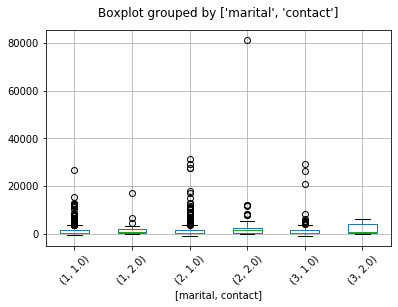

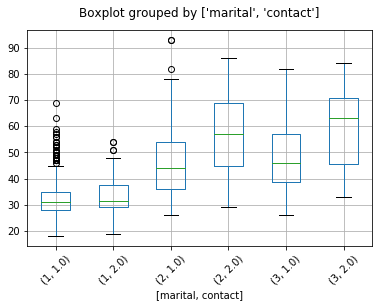

In [27]:
df.boxplot(column='balance', by=['marital','contact'], rot=45)
plt.title("")
plt.show()

df.boxplot(column='age', by=['marital','contact'], rot=45)
plt.title("")
plt.show()




We can see some variation in the median of `LoanAmount` for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.

In [10]:
ptable = df.pivot_table(values='LoanAmount', 
                        index='Self_Employed_Yes',
                        columns='Education_Not Graduate',  
                        aggfunc=np.median)
ptable

Education_Not Graduate,0,1
Self_Employed_Yes,,
0,130.0,113.0
1,157.5,130.0


Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `LoanAmount`.

In [11]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['Self_Employed_Yes'], x['Education_Not Graduate']]

# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(get_element, axis=1), inplace=True)

Let's take a simplified approach for `Dependents`, `Loan_Amount_Term` and `Credit_History` and fill in the missing values in these columns with the median. Note that the median is likely a better choice than the mean for these columns because the means are not likely to be realistic values.

In [12]:
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

## D. Rescaling Features

Many ML algorithms assume that all numerical features are on the same scale. Two standard techniques in the Python module `scikit-learn` for achieving this are:
* MinMaxScaler - rescales a column to the interval [0,1]
* StandardScaler - rescales a numerical column so that it has mean 0 and standard deviation 1.

Here we use a third technique, called `RobustScaler` to `LoanAmount` and `ApplicantIncome` which does a better job in the presence of outliers (we observed outliers in columns `LoanAmount` and `ApplicantIncome`). `RobustScaler` transforms each value in a column by subtracting the median from it and then dividing by the interquartile range.

We will deal with `CoapplicantIncome` and `Loan_Amount_Term` later. Note that all other attributes are binary.

In [13]:
robust_scaler = RobustScaler()
df[['ApplicantIncome',
    'LoanAmount']] = robust_scaler.fit_transform(df[['ApplicantIncome',
                                                     'LoanAmount']])

To bring column `Dependents` to the interval $[0,1]$ we can simply divide it by 3, as it is an ordinal columns with four possible values: 0, 1, 2 and 3.

In [14]:
df['Dependents'] = df['Dependents']/3

## E. Treatment of Outliers

#### `ApplicantIncome` and `LoanAmount`

In the previous lab exercise, we observed that `ApplicantIncome` and `LoanAmount` contain some extreme values. Let's take a look at the box plots of `ApplicantIncome`,`LoanAmount` to verify that they have outliers. We will deal with `CoapplicantIncome` and `Loan_Amount_Term` later. All other columns do not have outliers.

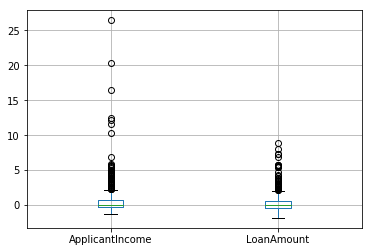

In [15]:
df.boxplot(column=['ApplicantIncome','LoanAmount'])
plt.show()

Let's also take a look at their histograms after we have rescaled them.

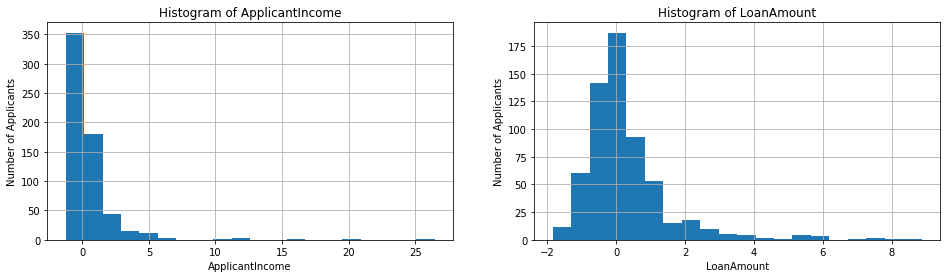

In [16]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of ApplicantIncome")
ax1.set_xlabel('ApplicantIncome')
ax1.set_ylabel('Number of Applicants')
df['ApplicantIncome'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of LoanAmount")
ax3.set_xlabel('LoanAmount')
ax3.set_ylabel('Number of Applicants')
df['LoanAmount'].hist(bins=20)

plt.show()

Both histograms are skewed to the left, which is not ideal. Many ML algorithms work best when the features are not skewed to either side.

Finally, before treating the outliers, let's find the minimum values in these columns.

In [17]:
df[['ApplicantIncome', 'LoanAmount']].min()

ApplicantIncome   -1.255356
LoanAmount        -1.844961
dtype: float64

Since the extreme values are practically possible in both columns, i.e. some people might have large income and also apply for high-value loans, instead of ignoring the data rows with extreme values we can transform them to diminish the negative impact of outliers to ML models. A typical way to do this is to apply a log transformation. However, we do have negative values in both columns after rescaling and we need to add a constant to all values in order to shift them to a positive range before applying a log transformation. 

Here we are have chosen to shift the values to the interval $[1, +\infty]$ before applying a log transformation.

In [18]:
# Use a log transformation to decrease the impact of outliers
df['ApplicantIncome'] = np.log(df['ApplicantIncome']+2.26)
df['LoanAmount'] = np.log(df['LoanAmount']+2.85)

Let's plot again.

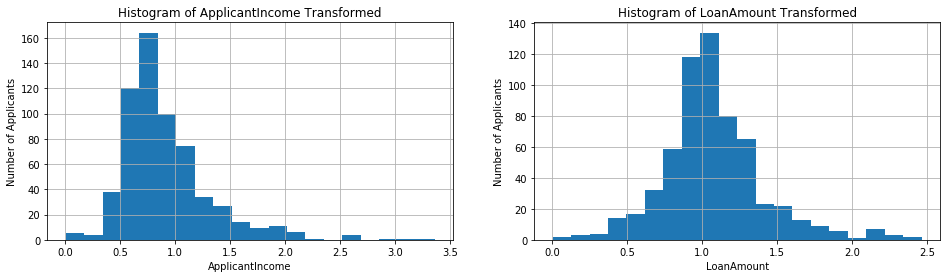

In [19]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of ApplicantIncome Transformed")
ax1.set_xlabel('ApplicantIncome')
ax1.set_ylabel('Number of Applicants')
df['ApplicantIncome'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of LoanAmount Transformed")
ax3.set_xlabel('LoanAmount')
ax3.set_ylabel('Number of Applicants')
df['LoanAmount'].hist(bins=20)

plt.show()

The histograms show that the transformed features are less skewed and have distributions closer to normal than the original features `LoanAmount` and `ApplicantIncome`.

#### `Loan_Amount_Term`

Let's examine the distribution of values in `Loan_Amount_Term`. 

In [20]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Note that `Loan_Amount_Term` is rather an ordinal than a continuous numerical feature with more than 80% of its values being 360.0. None of its values appear to be actual outliers. To bring it to the interval $[0,1]$ we can divide all values by 480 (effectively applying MinMaxScaler to it). If we applied RobustScaler and/or log transformation to it instead then it would become even more skewed to the right (you may verify this).

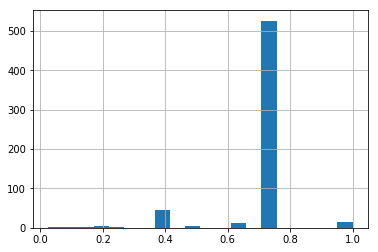

In [21]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/480
df['Loan_Amount_Term'].hist(bins=20)
plt.show()

## F. Creation of Derived Features

Column `CoapplicantIncome` contains many zeros which can be interpreted as `there is no co-applicant with income greater than 0`. The zeros are *missing values* which should not be filled in because they are missing for a reason. On the other hand, they skew the feature towards 0 and this cannot be easily fixed with a log transformation.

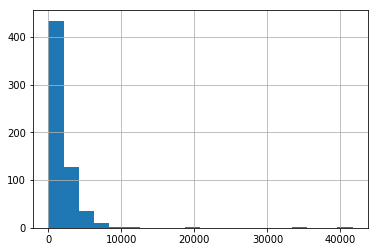

In [22]:
df['CoapplicantIncome'].hist(bins=20)
plt.show()

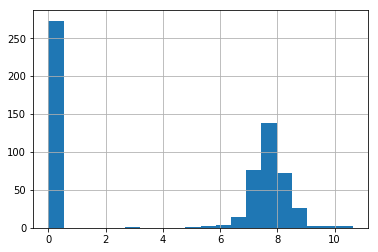

In [23]:
np.log(df['CoapplicantIncome']+1).hist(bins=20)
plt.show()

What we can do in this case instead is:
* Create a new feature `TotalIncome` as the sum of the *original* `ApplicantIncome` and `CoapplicantIncome`
* Drop column `CoapplicantIncome` because it can be derived from `ApplicantIncome` and `CoapplicantIncome`.

In [24]:
# Create TotalIncome column and apply a log transformation
df['TotalIncome'] = df_original['ApplicantIncome'] + df_original['CoapplicantIncome']
df[['TotalIncome']] = robust_scaler.fit_transform(df[['TotalIncome']])
df[['TotalIncome']].min()

TotalIncome   -1.184385
dtype: float64

In [25]:
df['TotalIncome'] = np.log(df['TotalIncome']+2.19)

Let's plot `TotalIncome`.

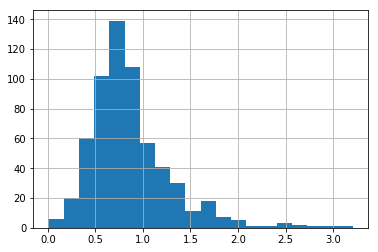

In [26]:
df['TotalIncome'].hist(bins=20)
plt.show()

Let's drop `CoapplicantIncome`.

In [27]:
df.drop('CoapplicantIncome', axis=1, inplace=True)

# G. Save the Prepared Dataset

Finally, let's save the prepared dataset as a CSV file.

In [18]:
df.to_csv('loans_train_prepared.csv')